# 5. Carbon Source Optimization

### Import libraries:

In [5]:
# First, we can import some functions so we can use the model
from cobra.io import read_sbml_model, write_sbml_model
from cobra import Reaction, Metabolite
import cobra

import matplotlib.pyplot as plt
import numpy as np

### Read model:

In [6]:
# Second, we can read the GEM and save it as ‘model’
model = read_sbml_model('data/iML1515_het.xml')

## Basal state of the model:

### Medium:

The iML1515_het model, originally, assumes growth on glucose media. We can see the detailed composition of this media here:

In [7]:
glucose_medium = model.medium
for key, value in model.medium.items():
    print("Metabolite (Exchange reaction):", key)
    print("Amount:", value)
    print("---")

Metabolite (Exchange reaction): EX_pi_e
Amount: 1000.0
---
Metabolite (Exchange reaction): EX_co2_e
Amount: 1000.0
---
Metabolite (Exchange reaction): EX_fe3_e
Amount: 1000.0
---
Metabolite (Exchange reaction): EX_h_e
Amount: 1000.0
---
Metabolite (Exchange reaction): EX_mn2_e
Amount: 1000.0
---
Metabolite (Exchange reaction): EX_fe2_e
Amount: 1000.0
---
Metabolite (Exchange reaction): EX_glc__D_e
Amount: 10.0
---
Metabolite (Exchange reaction): EX_zn2_e
Amount: 1000.0
---
Metabolite (Exchange reaction): EX_mg2_e
Amount: 1000.0
---
Metabolite (Exchange reaction): EX_ca2_e
Amount: 1000.0
---
Metabolite (Exchange reaction): EX_ni2_e
Amount: 1000.0
---
Metabolite (Exchange reaction): EX_cu2_e
Amount: 1000.0
---
Metabolite (Exchange reaction): EX_sel_e
Amount: 1000.0
---
Metabolite (Exchange reaction): EX_cobalt2_e
Amount: 1000.0
---
Metabolite (Exchange reaction): EX_h2o_e
Amount: 1000.0
---
Metabolite (Exchange reaction): EX_mobd_e
Amount: 1000.0
---
Metabolite (Exchange reaction): EX_so

### Yield:

The maximum theoretical production of Biomass, P3HB and the yield of P3HB per unit of glucose was calculated in document [02_Model Exploration (Base Yields and PPP)](02_Model Exploration (Base Yields and PPP).ipynb). 

We can quickly recover those values by running the following code:

In [8]:
with model:
    r_phaC_exp = model.add_boundary(model.metabolites.get_by_id('P3HB_c'), type='sink')
    model.objective = r_phaC_exp
    solution_glc = model.optimize()
    P3HB_production_glc = solution_glc.objective_value
    print("Max. p3HB production [mmol gDW^-1 h^-1]:", P3HB_production_glc)
    print("Theoretical max. yield [mmol-P3HB / mmol-glucose]:", P3HB_production_glc / (-1 * model.reactions.get_by_id('EX_glc__D_e').flux))
    max_yield_mmol_glc = P3HB_production_glc / (-1*model.reactions.get_by_id('EX_glc__D_e').flux)

Max. p3HB production [mmol gDW^-1 h^-1]: 1.2500530973451311
Theoretical max. yield [mmol-P3HB / mmol-glucose]: 0.12500530973451313


### Yield (C-mol):

Let's get those yields in C-mol:

In [9]:
Cfactor_P3HB = 40     # Cmol/mol conversion factor for P3HB (polymerization degree of 10)
Cfactor_Glucose = 6   # Cmol/mol conversion factor for Glucose

In [10]:
max_yield_cmol_glc = (max_yield_mmol_glc*Cfactor_P3HB)/(1*Cfactor_Glucose)
print('Maximum theoretical yield [mmol-P3HB / mmol-glucose]:', max_yield_cmol_glc, 'cmol-P3HB/cmol-glc')

Maximum theoretical yield [mmol-P3HB / mmol-glucose]: 0.833368731563421 cmol-P3HB/cmol-glc


### Flux distribution:

We can see the distribution of fluxes in the following graph:

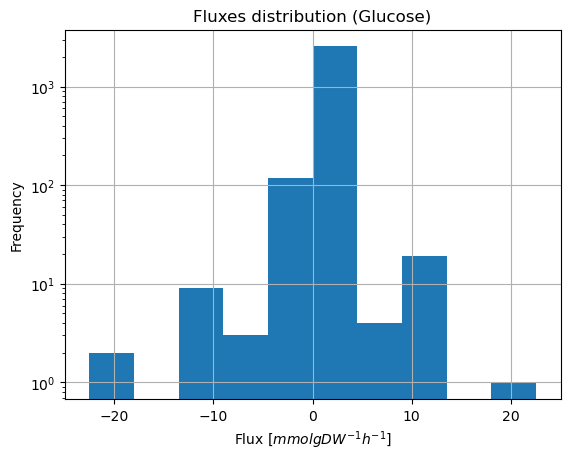

In [11]:
# Plot the fluxes distribution:
fig = solution_glc.fluxes.hist()

# Set plot parameters:
plt.xlim(-25, 25)  # Set the minimum and maximum x-axis values
plt.yscale('log')  # Set y axis as logarithmic

fig.set_xlabel('Flux [$mmol gDW^{-1} h^{-1}]$')
fig.set_ylabel('Frequency');
plt.title('Fluxes distribution (Glucose)')

plt.show()

## Growth on Acetate:

### Medium:

First, we need to modify the medium from containing glucose and no acetate, to acetate and no glucose:

In [12]:
acetate_medium = model.medium
acetate_medium['EX_glc__D_e'] = 0
acetate_medium['EX_ac_e'] = 10
model.medium = acetate_medium

Let's check out the detailed composition of this media:

In [13]:
acetate_medium = model.medium
for key, value in model.medium.items():
    print("Metabolite (Exchange reaction):", key)
    print("Amount:", value)
    print("---")

Metabolite (Exchange reaction): EX_pi_e
Amount: 1000.0
---
Metabolite (Exchange reaction): EX_co2_e
Amount: 1000.0
---
Metabolite (Exchange reaction): EX_fe3_e
Amount: 1000.0
---
Metabolite (Exchange reaction): EX_h_e
Amount: 1000.0
---
Metabolite (Exchange reaction): EX_mn2_e
Amount: 1000.0
---
Metabolite (Exchange reaction): EX_ac_e
Amount: 10
---
Metabolite (Exchange reaction): EX_fe2_e
Amount: 1000.0
---
Metabolite (Exchange reaction): EX_zn2_e
Amount: 1000.0
---
Metabolite (Exchange reaction): EX_mg2_e
Amount: 1000.0
---
Metabolite (Exchange reaction): EX_ca2_e
Amount: 1000.0
---
Metabolite (Exchange reaction): EX_ni2_e
Amount: 1000.0
---
Metabolite (Exchange reaction): EX_cu2_e
Amount: 1000.0
---
Metabolite (Exchange reaction): EX_sel_e
Amount: 1000.0
---
Metabolite (Exchange reaction): EX_cobalt2_e
Amount: 1000.0
---
Metabolite (Exchange reaction): EX_h2o_e
Amount: 1000.0
---
Metabolite (Exchange reaction): EX_mobd_e
Amount: 1000.0
---
Metabolite (Exchange reaction): EX_so4_e
Am

### Yield:

In [14]:
with model:    
    r_phaC_exp = model.add_boundary(model.metabolites.get_by_id('P3HB_c'), type='sink')
    model.objective = r_phaC_exp
    solution_ace = model.optimize()
    P3HB_production_ace = solution_ace.objective_value
    print("Max. p3HB production [mmol gDW^-1 h^-1]:", P3HB_production_ace)
    print("Theoretical max. yield [mmol-P3HB / mmol-acetate]:", P3HB_production_ace / (-1 * model.reactions.get_by_id('EX_ac_e').flux))
    max_yield_mmol_ace = P3HB_production_ace / (-1*model.reactions.get_by_id('EX_ac_e').flux)

Max. p3HB production [mmol gDW^-1 h^-1]: 0.3424000000000009
Theoretical max. yield [mmol-P3HB / mmol-acetate]: 0.03424000000000009


### Yield (C-mol):

In [15]:
Cfactor_P3HB = 40     # Cmol/mol conversion factor for P3HB (polymerization degree of 10)
Cfactor_Acetate = 2   # Cmol/mol conversion factor for Acetate

In [16]:
max_yield_cmol_ace = (max_yield_mmol_ace*Cfactor_P3HB)/(1*Cfactor_Acetate)
print('Maximum theoretical yield [mmol-P3HB / mmol-acetate]:', max_yield_cmol_ace, 'cmol-P3HB/cmol-ace')

Maximum theoretical yield [mmol-P3HB / mmol-acetate]: 0.6848000000000019 cmol-P3HB/cmol-ace


### Flux distribution:

We can see the distribution of fluxes in the following graph:

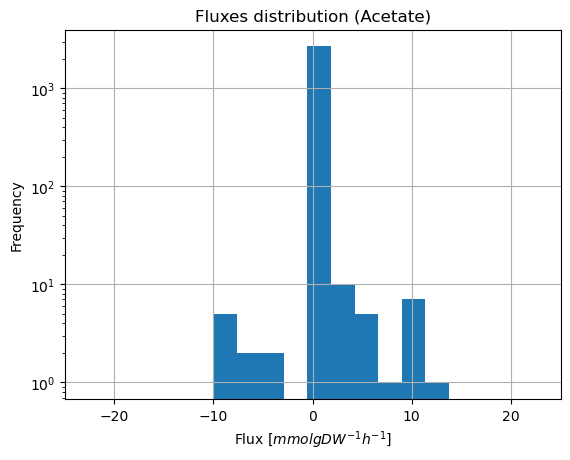

In [17]:
# Plot the fluxes distribution:
fig = solution_ace.fluxes.hist()

# Set plot parameters:
plt.xlim(-25, 25)  # Set the minimum and maximum x-axis values
plt.yscale('log')  # Set y axis as logarithmic

fig.set_xlabel('Flux [$mmol gDW^{-1} h^{-1}]$')
fig.set_ylabel('Frequency');
plt.title('Fluxes distribution (Acetate)')

plt.show()

## Growth on Glycerol:

### Medium:

In this case, we need to modify the medium from containing acetate and no glycerol, to glycerol and no acetate:

In [18]:
glycerol_medium = model.medium
glycerol_medium['EX_ac_e'] = 0
glycerol_medium['EX_gly_e'] = 10
model.medium = glycerol_medium

Let's check out the detailed composition of this media:

In [19]:
acetate_medium = model.medium
for key, value in model.medium.items():
    print("Metabolite (Exchange reaction):", key)
    print("Amount:", value)
    print("---")

Metabolite (Exchange reaction): EX_pi_e
Amount: 1000.0
---
Metabolite (Exchange reaction): EX_co2_e
Amount: 1000.0
---
Metabolite (Exchange reaction): EX_fe3_e
Amount: 1000.0
---
Metabolite (Exchange reaction): EX_h_e
Amount: 1000.0
---
Metabolite (Exchange reaction): EX_mn2_e
Amount: 1000.0
---
Metabolite (Exchange reaction): EX_fe2_e
Amount: 1000.0
---
Metabolite (Exchange reaction): EX_gly_e
Amount: 10
---
Metabolite (Exchange reaction): EX_zn2_e
Amount: 1000.0
---
Metabolite (Exchange reaction): EX_mg2_e
Amount: 1000.0
---
Metabolite (Exchange reaction): EX_ca2_e
Amount: 1000.0
---
Metabolite (Exchange reaction): EX_ni2_e
Amount: 1000.0
---
Metabolite (Exchange reaction): EX_cu2_e
Amount: 1000.0
---
Metabolite (Exchange reaction): EX_sel_e
Amount: 1000.0
---
Metabolite (Exchange reaction): EX_cobalt2_e
Amount: 1000.0
---
Metabolite (Exchange reaction): EX_h2o_e
Amount: 1000.0
---
Metabolite (Exchange reaction): EX_mobd_e
Amount: 1000.0
---
Metabolite (Exchange reaction): EX_so4_e
A

## Yield:

In [20]:
with model:    
    r_phaC_exp = model.add_boundary(model.metabolites.get_by_id('P3HB_c'), type='sink')
    model.objective = r_phaC_exp
    solution_gly = model.optimize()
    P3HB_production_gly = solution_gly.objective_value
    print("Max. p3HB production [mmol gDW^-1 h^-1]:", P3HB_production_gly)
    print("Theoretical max. yield [mmol-P3HB / mmol-glycerol]:", P3HB_production_gly / (-1 * model.reactions.get_by_id('EX_gly_e').flux))
    max_yield_mmol_gly = P3HB_production_gly / (-1*model.reactions.get_by_id('EX_gly_e').flux)

Max. p3HB production [mmol gDW^-1 h^-1]: 0.29029885057471266
Theoretical max. yield [mmol-P3HB / mmol-glycerol]: 0.029029885057471266


### Yield (C-mol):

In [21]:
Cfactor_P3HB = 40     # Cmol/mol conversion factor for P3HB (polymerization degree of 10)
Cfactor_Glycerol = 3   # Cmol/mol conversion factor for Glycerol

In [22]:
max_yield_cmol_gly = (max_yield_mmol_gly*Cfactor_P3HB)/(1*Cfactor_Glycerol)
print('Maximum theoretical yield [mmol-P3HB / mmol-glycerol]:', max_yield_cmol_gly, 'cmol-P3HB/cmol-gly')

Maximum theoretical yield [mmol-P3HB / mmol-glycerol]: 0.3870651340996169 cmol-P3HB/cmol-gly


### Flux distribution:

We can see the distribution of fluxes in the following graph:

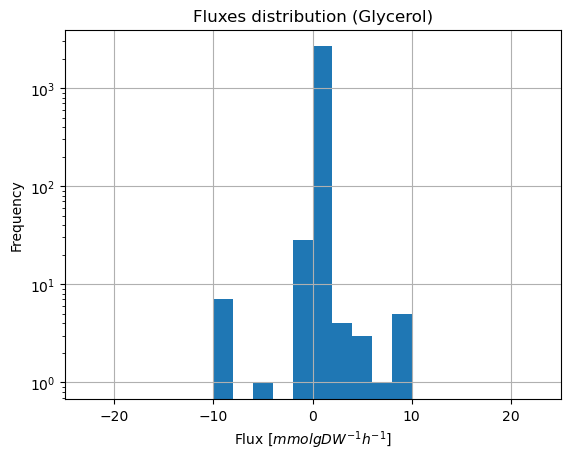

In [23]:
# Plot the fluxes distribution:
fig = solution_gly.fluxes.hist()

# Set plot parameters:
plt.xlim(-25, 25)  # Set the minimum and maximum x-axis values
plt.yscale('log')  # Set y axis as logarithmic

fig.set_xlabel('Flux [$mmol gDW^{-1} h^{-1}]$')
fig.set_ylabel('Frequency');
plt.title('Fluxes distribution (Glycerol)')

plt.show()

## Yield comparison:

### mmol/mmol:

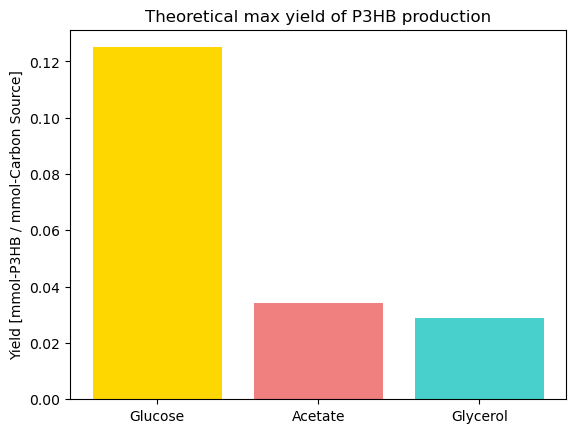

In [24]:
Carbon_sources = ['Glucose', 'Acetate', 'Glycerol']
Yields = [max_yield_mmol_glc, max_yield_mmol_ace, max_yield_mmol_gly]
colors = ('gold', 'lightcoral', 'mediumturquoise')

plt.bar(Carbon_sources, Yields, color=colors)

plt.ylabel('Yield [mmol-P3HB / mmol-Carbon Source]')
plt.title('Theoretical max yield of P3HB production')

plt.show()

### c-mol/c-mol:

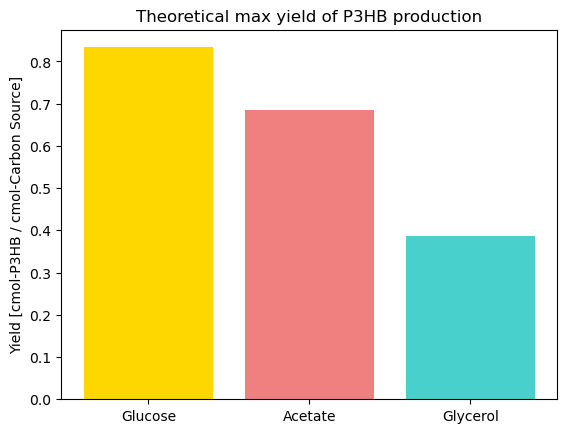

In [25]:
Carbon_sources = ['Glucose', 'Acetate', 'Glycerol']
Yields = [max_yield_cmol_glc, max_yield_cmol_ace, max_yield_cmol_gly]
colors = ('gold', 'lightcoral', 'mediumturquoise')

plt.bar(Carbon_sources, Yields, color=colors)

plt.ylabel('Yield [cmol-P3HB / cmol-Carbon Source]')
plt.title('Theoretical max yield of P3HB production')

plt.show()

In [26]:
print('Yield reduction Glc to Ace:', round((1 - (max_yield_cmol_ace/max_yield_cmol_glc))*100, 2), "%")

Yield reduction Glc to Ace: 17.83 %


What we can see, is that it is possible to produce a fair amount of P3HB by unit of carbon source when growing on acetate rather than glucose. On the other hand, production of P3HB is reduced by almost half of it when we try to produce it growing on glycerol as unqiue carbon source.

Also, what we can observe when looking at the fluxes distributions, is that we have indeed a change in metabolism when growing in different carbon sources. 

We conclude then, that we can grow E. coli on acetate to produce P3HB with a yield loss of only around 18%. 